<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240913_%EA%B3%BC%EC%A0%9C_%EC%95%99%EC%83%81%EB%B8%94%ED%95%99%EC%8A%B5%EA%B3%BC%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER7. 앙상블 학습과 랜덤포레스트**

In [3]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

voting_clf=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8
RandomForestClassifier 0.9
SVC 0.9
VotingClassifier 0.9


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=50, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

In [10]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.95

In [11]:
from sklearn.metrics import accuracy_score
y_pred-bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [12]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.26630435, 0.73369565],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.00552486, 0.99447514],
       [0.99468085, 0.00531915],
       [0.07865169, 0.92134831],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.79005525, 0.20994475],
       [1.        , 0.        ],
       [0.99354839, 0.00645161],
       [0.96629213, 0.03370787],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.98477157, 0.01522843],
       [0.02830189, 0.97169811],
       [0.        , 1.        ],
       [0.07614213, 0.92385787],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.95294118, 0.04705882],
       [0.95238095, 0.04761905],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf=rnd_clf.predict(X_test)
y_pred_rf

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [15]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(max_features='auto', max_leaf_nodes=10),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

In [16]:
from sklearn.datasets import load_iris

iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.10875709559905479
sepal width (cm) 0.023263652594783017
petal length (cm) 0.43575298161137943
petal width (cm) 0.43222627019478277


In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [19]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [20]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [22]:
#y_pred=sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val=train_test_split(X, y)

gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors=[mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators=np.argmin(errors)+1

gbrt_best=GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=106)

In [27]:
gbrt=GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error=float('inf')
crror_going_up=0
for n_estimators in range(1, 120):
  gbrt.n_estimators=n_estimators
  gbrt.fit(X_train, y_train)
  y_pred=gbrt.predict(X_val)
  val_error=mean_squared_error(y_val, y_pred)
  if val_error<min_val_error:
    min_val_error=val_error
    error_going_up=0
  else:
    error_going_up+=1
    if error_going_up==5:
      break # 조기 종료

In [33]:
!pip install --upgrade xgboost

In [34]:
from xgboost import XGBRegressor

xgb_reg=XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred=xgb_reg.predict(X_val)
y_pred

array([-1.2206315e-02,  3.6519688e-01, -2.5815179e-05, -5.3257204e-04,
        9.9901968e-01,  9.9997222e-01,  1.0000466e+00,  1.0001626e+00,
        1.0000466e+00,  3.6782309e-01, -2.5815179e-05,  6.2277377e-01,
        9.9975282e-01,  1.0001626e+00,  3.9828461e-04,  9.7348034e-01,
        1.0000466e+00,  9.9961269e-01,  3.7076318e-01,  9.9997222e-01,
        9.9997222e-01,  9.9975282e-01, -3.4318164e-05,  2.1514825e-03,
        9.9975282e-01], dtype=float32)

In [37]:
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_val, y_val)])
y_pred=xgb_reg.predict(X_val)
y_pred

[0]	validation_0-rmse:0.38201
[1]	validation_0-rmse:0.30220
[2]	validation_0-rmse:0.25241
[3]	validation_0-rmse:0.24024
[4]	validation_0-rmse:0.23905
[5]	validation_0-rmse:0.24229
[6]	validation_0-rmse:0.24670
[7]	validation_0-rmse:0.25095
[8]	validation_0-rmse:0.24777
[9]	validation_0-rmse:0.24566
[10]	validation_0-rmse:0.24412
[11]	validation_0-rmse:0.24631
[12]	validation_0-rmse:0.24617
[13]	validation_0-rmse:0.24605
[14]	validation_0-rmse:0.24709
[15]	validation_0-rmse:0.24709
[16]	validation_0-rmse:0.24721
[17]	validation_0-rmse:0.24761
[18]	validation_0-rmse:0.24793
[19]	validation_0-rmse:0.24814
[20]	validation_0-rmse:0.24831
[21]	validation_0-rmse:0.24849
[22]	validation_0-rmse:0.24862
[23]	validation_0-rmse:0.24873
[24]	validation_0-rmse:0.24878
[25]	validation_0-rmse:0.24879
[26]	validation_0-rmse:0.24884
[27]	validation_0-rmse:0.24884
[28]	validation_0-rmse:0.24885
[29]	validation_0-rmse:0.24891
[30]	validation_0-rmse:0.24890
[31]	validation_0-rmse:0.24890
[32]	validation_0-

array([-1.2206315e-02,  3.6519688e-01, -2.5815179e-05, -5.3257204e-04,
        9.9901968e-01,  9.9997222e-01,  1.0000466e+00,  1.0001626e+00,
        1.0000466e+00,  3.6782309e-01, -2.5815179e-05,  6.2277377e-01,
        9.9975282e-01,  1.0001626e+00,  3.9828461e-04,  9.7348034e-01,
        1.0000466e+00,  9.9961269e-01,  3.7076318e-01,  9.9997222e-01,
        9.9997222e-01,  9.9975282e-01, -3.4318164e-05,  2.1514825e-03,
        9.9975282e-01], dtype=float32)

## **7.6 스태킹**
앙상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련시킨다는 아이디어로 출발한다. [그림 7-12]는 새로운 샘플에 회귀 작업을 수행하는 앙상블을 보여준다. 아래의 세 예측기는 각각 다른 값 (3.1, 2.7, 2.9)을 예측하고 마지막 예측기(블렌더 또는 메타 학습기)가 이 예측을 입력으로 받아 최종 예측(3.0)을 만든다.

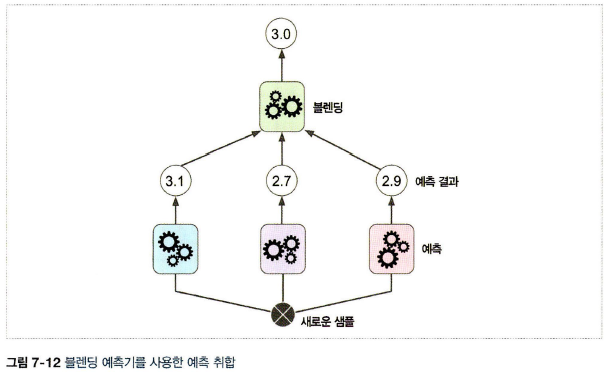

블렌더를 학습시키는 일반적인 방법은 홀드 아웃 세트를 사용하는 것이다. 어떻게 작동하는지 살펴보자. 먼저 훈련 세트를 두 개의 서브셋으로 나눈다. 첫 번째 서브셋은 첫 번째 레이어의 예측을 훈련시키기 위해 사용된다(그림 7-13).

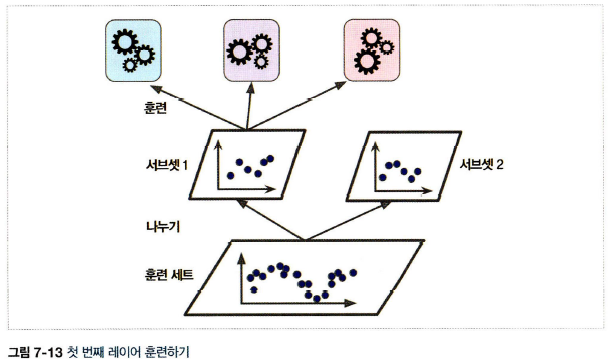

그런 다음 첫 번째 레이어의 예측기를 사용해 두 번째 세트에 대한 예측을 만든다(그림 7-14). 예측기들이 훈련하는 동안 이 샘플들을 전혀 보지 못했기 때문에 이때 만들어진 예측은 완전히 새로운 것이다. 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값이 있다. 타깃값은 그래도 쓰고 앞에서 예측한 값을 입력 특성으로 사용하는 새로운 훈련 세트를 만들 수 있다(새로운 훈련 세트는 3차원이 된다). 블렌더가 새 훈련 세트로 훈련된다. 즉, 첫 번째 레이어의 예측을 가지고 타깃값을 예측하도록 학습된다.

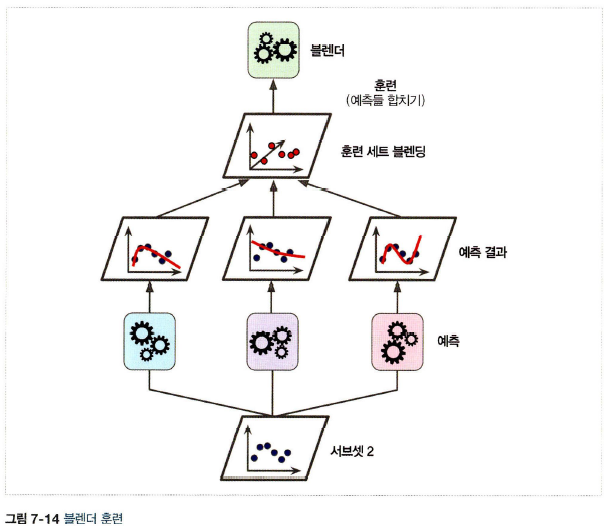

이런 방식의 블렌더를 여러 개 훈련시키는 것도 가능하다(예를 들어 하나는 선형 회귀로, 다른 하나는 랜덤 포레스트 회귀로). 그러면 블렌더만의 레이어가 만들어지게 된다. 이렇게 하려면 훈련 세트를 세 개의 서브셋으로 나눈다. 첫 번째 세트는 첫 번째 레이어를 훈련시키는 데 사용되고 두 번째 세트는 (첫 번째 레이어의 예측기로) 두 번째 레이어를 훈련시키기 위한 훈련 세트를 만드는 데 사용된다. 그리고 세 번째 세트는 (두 번째 레이어의 예측기로) 세 번째 레이어를 훈련시키기 위한 훈련 세트를 만드는 데 사용된다. 작업이 끝나면 [그림 7-15]처럼 각 레이어를 차례대로 실행해서 새로운 샘플에 대한 예측을 만들 수 있다.

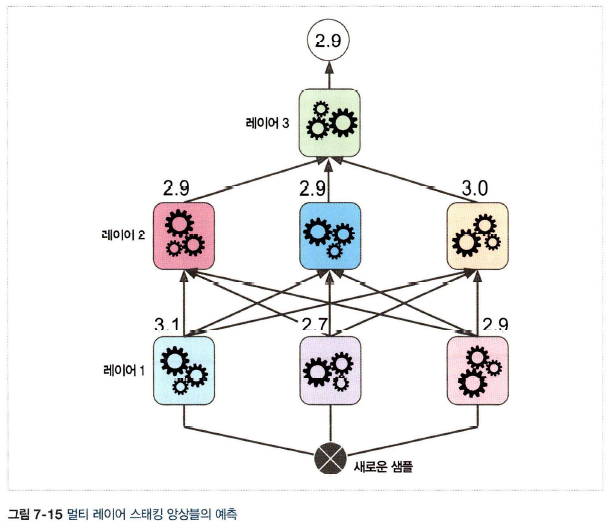

사이킷런은 스태킹을 직접 지원하지 않는다.

DESlib(https://github.com/Menelau/DESlib)같은 오픈 소스 구현을 사용할 수 있다.